# Job Rejection Data Analysis

Let's dive into some interesting questions and analysis regarding job rejection emails. We have over 80 emails to work with including features such as `Time`, `Day`, `Subject`, and `Text`. A couple interesting questions that I thought of initially are the following:
* What day of the week are most job rejections sent out?
* What time do most job rejections get sent out?
* What are common phrases and words used in the subject of the email?
* What are common phrases and words used in the body of the email?
* How do different companies rejection emails differ in sentiment and verbage?

In [25]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from collections import Counter
import nltk
%matplotlib inline
sns.set(style='whitegrid', palette='muted', font_scale=1.3)

In [2]:
# Read data
df = pd.read_csv('rejections.csv')
df.head()

,Date,Time,Day,Hour,Subject,Text
0,2018-07-12 12:31:08,12:31:08,Thurs,12,Your IBM Application,Ref: 110127BR - 2018 Data Scientist Internship...
1,2018-06-12 16:30:28,16:30:28,Tues,16,Thank you from Workday!,"<!doctype html><html xmlns:o=3D""urn:schemas-mi..."
2,2018-05-17 08:43:38,08:43:38,Thurs,8,An Update Regarding Your Visa Job Application,"\r\nDear Conor,\r\nThank you for giving us the..."
3,2018-05-01 15:21:05,15:21:05,Tues,15,Thank you for your interest in Zynga for Inter...,<html><head>\r\n<meta http-equiv=3DContent-Typ...
4,2018-04-26 14:49:02,14:49:02,Thurs,14,Your Application with Cambia Health Solutions,"Dear Conor,\r\n=C2=A0\r\nThank you for the int..."


In [3]:
# Data overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 6 columns):
Date       86 non-null object
Time       86 non-null object
Day        86 non-null object
Hour       86 non-null int64
Subject    86 non-null object
Text       86 non-null object
dtypes: int64(1), object(5)
memory usage: 4.1+ KB


As you can see, we have a little over 80 different job rejections to review from my internship search over the course of the last year. For a little background, let's go over my internship search by the numbers and get a better feel for what we're working with.
* Applications: 234
* Replies: 93
* Rejections: 90 
* Offers: 3

## Which Companies Are Included?

In [4]:
# Subject list
df['Subject'].value_counts()

Update - Data Analytics Intern - Undergraduate & Masters Degrees,\r\n 1765077                                   2
Your application to Software Engineer, Intern 2018 (San Francisco)\r\n at Airbnb                                2
Your Uber Application                                                                                           2
Thanks for your Application!                                                                                    2
Illumina: Status of your application                                                                            2
BlackRock | We Wish You Success                                                                                 2
Thank you for your interest                                                                                     2
Your application for Data Scientist Intern - New York at Spotify.                                               1
Your application to Airware: Data Science Intern - Fall                                 

## What Day Are Job Rejections Most Frequent?

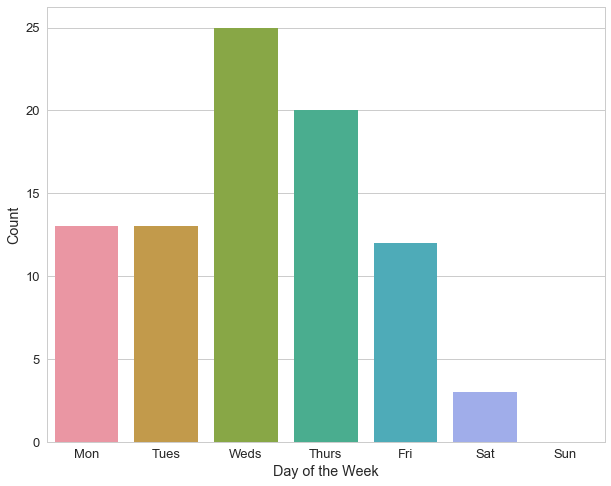

In [5]:
# Visualization
plt.figure(figsize=(10,8))
sns.countplot(df['Day'], order=['Mon', 'Tues', 'Weds', 'Thurs', 'Fri', 'Sat', 'Sun']);
plt.xlabel('Day of the Week')
plt.ylabel('Count');

### Key Insights
* Rejections most frequently came on Wednesdays
* Thursdays also appear to be a popular day for bad news
* Sundays are smooth sailing but apparently Saturdays are fair game...

## Who Sends Rejection Emails on Saturdays?

In [6]:
# Subset data
sat = df.loc[df['Day'] == 'Sat']
sat.head()

,Date,Time,Day,Hour,Subject,Text
46,2017-12-16 15:04:42,15:04:42,Sat,15,Important information about your application t...,"Hi Conor,\r\nThank you for applying to Softwar..."
63,2017-11-04 07:27:04,07:27:04,Sat,7,Thank you for your interest in TripAdvisor,"Hi Conor,\r\n\r\nThank you for your interest i..."
69,2017-09-30 13:02:53,13:02:53,Sat,13,Thank you for your interest,"<div><img src=""https://performancemanager4.suc..."


In [7]:
# First offender: LendUp
print(sat.iloc[0]['Subject'])
print(sat.iloc[0]['Text'])

Important information about your application to LendUp
Hi Conor,
Thank you for applying to Software Engineering Intern. After reviewing with the team, we have decided not to move forward with your candidacy. Due to the number of applications we receive we are not able to provide specific feedback.

We will keep your details on file and let you know if any suitable openings arise.

Thanks again for your interest in LendUp and we wish you the best of luck in your search!

Regards,
LendUp Recruiting Team


In [8]:
# Second offender: TripAdvisor
print(sat.iloc[1]['Subject'])
print(sat.iloc[1]['Text'])

Thank you for your interest in TripAdvisor
Hi Conor,

Thank you for your interest in the 17-18 Campus - Machine Learning Intern p=
osition at TripAdvisor. We have received your application and it is current=
ly being reviewed by the hiring team. We will be in touch if there is inter=
est in moving forward.

In the meantime please be sure to visit our careers page ( http://www.tripa=
dvisor.com/careers ) for more information about:

- our benefits and unique perks ( http://www.tripadvisor.com/careers/benefi=
ts )

- who we are and what we value ( http://www.tripadvisor.com/careers/culture=
 )

We encourage you to learn more about our people, our offices, our =E2=80=9C=
speed wins=E2=80=9D culture and the work we do by visiting our Twitter ( ht=
tps://twitter.com/gotripadvisor ),Instagram ( https://www.instagram.com/got=
ripadvisor/ ) and LinkedIn ( https://www.linkedin.com/company/tripadvisor/c=
areers ) pages. These pages provide an inside glimpse of life at TripAdviso=
r offices aroun

In [9]:
# Third offender: EA
print(sat.iloc[2]['Subject'])
print(sat.iloc[2]['Text'])

Thank you for your interest
<div><img src="https://performancemanager4.successfactors.com/doc/custom/ElectronicArts/EA_Logo.png" /></div>

<div>&nbsp;
<p>Dear Conor:</p>

<p>Thank you for applying to the Machine Learning Scientist Intern (Summer 2018) position. We&rsquo;ve had a very competitive pool of applicants. We appreciate your interest in the role but we have decided not to move your application forward.</p>

<p>We will keep your resume on file for future opportunities, and we encourage you to check our website often and apply for other EA positions.</p>

<p>Best Regards,<br />
The Global Recruiting Team at EA</p>
</div>



## What Times Are Job Rejections Most Frequent?

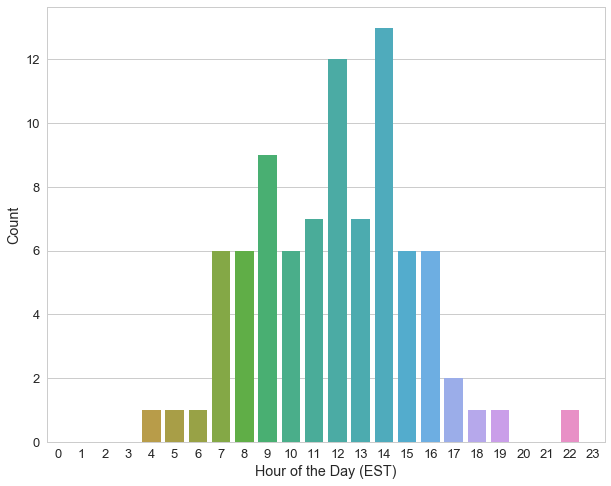

In [10]:
# Visualization
plt.figure(figsize=(10,8))
sns.countplot(df['Hour'], order=np.arange(0,24));
plt.xlabel('Hour of the Day (EST)')
plt.ylabel('Count');

### Key Insights
* We seem to see the normal distribution that we would expect
* There are spikes at 9am and 12am signaling the start of the workday for EST and PST respectively
* Only one rejection came in well after end of day for EST and PST...

## Who Sent Out the Late Email?

In [11]:
# Subset data
late = df.loc[df['Hour'] == 22]
late.head()

,Date,Time,Day,Hour,Subject,Text
79,2017-09-21 22:08:37,22:08:37,Thurs,22,P&G,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.01//..."


Looks like P&G sent out an automated rejection email at 10pm EST on a Thursday... Shame... 

## Common Subject Words & Phrases

In [12]:
# Tokenize and remove stop words
subject_str = df['Subject'].to_string()
words = nltk.word_tokenize(subject_str)
clean = [word for word in words if word not in stopwords.words('english')]

In [40]:
# Remove punctuation and numbers
punctuation = re.compile(r'[-.?!,":;()|0-9]')
clean = [punctuation.sub("", word) for word in clean]
clean = [word.lower() for word in clean if len(word) > 0]

In [41]:
# Get most common words
words = [item[0] for item in Counter(clean).most_common(10)]
counts = [item[1] for item in Counter(clean).most_common(10)]

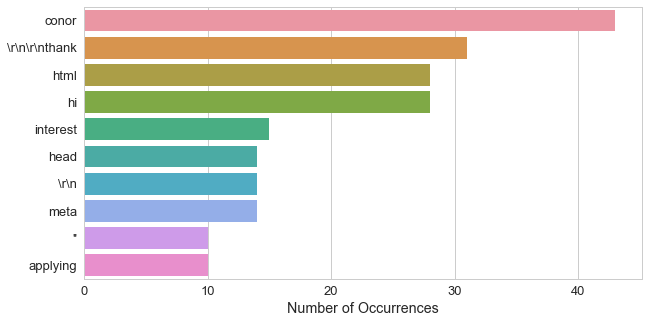

In [59]:
# Visualization
plt.figure(figsize=(10,5))
sns.barplot(counts, words);
plt.ylabel('');
plt.xlabel('Number of Occurrences');

### Key Insights
* It appears that common practice was some form of 'Thank you for your interest'
* Next most popular was a variation of 'Update on your application for x role'

## Common Body Words & Phrases

In [52]:
# Tokenize and remove stop words
subject_str = df['Text'].to_string()
words = nltk.word_tokenize(subject_str)
clean = [word for word in words if word not in stopwords.words('english')]

In [53]:
# Remove punctuation and numbers
punctuation = re.compile(r'[-.?!,":;()<>//``//]|0-9]')
clean = [punctuation.sub("", word) for word in clean]
clean = [word.lower() for word in clean if len(word) > 0]

In [55]:
# Get most common words
words = [item[0] for item in Counter(clean).most_common(10)]
counts = [item[1] for item in Counter(clean).most_common(10)]

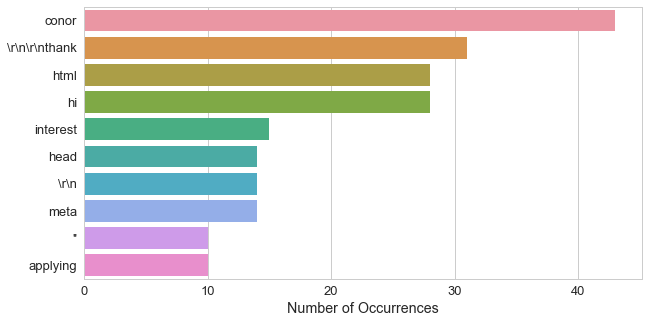

In [60]:
# Visualization
plt.figure(figsize=(10,5))
sns.barplot(counts, words);
plt.ylabel('');
plt.xlabel('Number of Occurrences');

### Key Insights
* Less to report here, more of the same
* More than half of the emails included my name in them

## Wrapping Up
That's it for now. Moving forward, I think it would be interesting to continue this analysis further and look into sentiment and fundamental differences between key companies. For more on this analysis, stay tuned for an accompanying blog post breaking it down further.